## L1 - Linear models and gradient descent

### Books
1. [Deep Learning, I. Goodfellow, Y. Bengio and A. Courville](http://www.deeplearningbook.org/)
2. [Neural networks for pattern recognition, C. Bishop](http://cs.du.edu/~mitchell/mario_books/Neural_Networks_for_Pattern_Recognition_-_Christopher_Bishop.pdf)
3. [Machine learning: a probabilistic perspective, K. Murphy](http://dsd.future-lab.cn/members/2015nlp/Machine_Learning.pdf)

### 0. Basic classification

Here you can see basic (possible, non standard) classification of [machine learning](https://en.wikipedia.org/wiki/Machine_learning) tasks.
1. [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning)
 1. [Regression](https://en.wikipedia.org/wiki/Regression_analysis)
 2. [Classification](https://en.wikipedia.org/wiki/Statistical_classification)
 3. [Ranking](https://en.wikipedia.org/wiki/Learning_to_rank)
2. [Reinforcment learning](https://en.wikipedia.org/wiki/Reinforcement_learning)
3. [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning)
 1. Clustering 
 2. Manifold learning
 3. Matrix decompostion (factorization)
 4. Dimension reduction
 
In this lab we consider only supervised learning. Namely, linear regression and binary linear classification, as simple methods for beginning.

### 1. Supervised learning basics
A supervised learning algorithm is an algorithm that is able to learn from data. Now we need only to clarify what is data and what it means to learn?

Let $\{x_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{X} = \mathbb{R}^{n}$ and $\{y_i\}_{i=1}^{\mathcal{l}} \subset \mathbb{Y}$. Here $\mathbb{X}$ is the whole set of objects and $\mathbb{Y}$ is all possible labels of objects, so $\{x_i\}_{i=1}^{\mathcal{l}}$ is subset with known labels $\{y_i\}_{i=1}^{\mathcal{l}}$. We want to find algorithm, that can predict $y$ for any $x \in \mathbb{X}$. Actually, $x = (x^1, \dots, x^n)$ is some vector of features (formal description), but $x^k$ can have different nature. 

* $x^k \in \{0, 1\}$ – binary feature, boolean flag
* $x^k \in \{1,\dots, m\}$ – categorical (nominal), classification of entities into particular categories.
* $x^k \in \{1,\dots, m\}^<$ – ordinal, classification of entities in some kind of ordered relationship.
* $x^k \in \mathbb{R}$ – cardinal, classification based on a numerical value.

Categorical features are commonly encoded in some way (for exaple [one-hot encoding](https://en.wikipedia.org/wiki/One-hot)) to ignore false ordering (important for metric algorithms). Moreover it's possible to cast any type of feature to $\mathbb{R}$, that's why we suppouse that $\mathbb{X} = \mathbb{R}^{n}$ further.

Process of finding algorithm, that can predict labels, is called training. Usually, it is reduced to minimization problem of the empirical risk.
$$\arg \min_{\theta} Q(\theta) = \arg \min_{\theta} \frac{1}{\mathcal{l}}\sum_{i=1}^{\mathcal{l}} \mathcal{L}(f(x_i | \theta), y_i).$$
Here $\mathcal{L}$ – some loss function that shows how good we predict $y$, and $f(x|\theta)$ is parametric function, where $\theta \in \Theta$.

### 2. Linear regression
For regression task $\mathbb{Y} = \mathbb{R}$. In case of linear model we have learning vector of parameters $w \in \mathbb{R}^n$ and predict $y$ as 
$$y = w^Tx + b.$$

For simplicity, let the last element of $x$ is always $1$ and $w$ is concatenation of $[w, b]$. So, we can rewrite model as $y = w^Tx$. For MSE (mean square error) we have following optimization problem
$$\arg \min_{w} Q(w) = \arg \min_{w} \sum_{i=1}^{\mathcal{l}}\big(w^Tx_i - y_i\big)^2.$$

Let $X$ is matrix, where $i$-th row is feature vector of $i$-th object and $Y$ – vector of labels. In this case our expression can be rewritten in matrix form
$$\arg\min_{w}||Xw - Y ||_{2}.$$
But this problem is already well studied and has the analytical solution
$$w = (X^TX)^{-1}X^TY.$$

#### Exercises
1. Let $y = sin(x) + \varepsilon$, where $x \in [0, 2\pi]$ and $\varepsilon \sim \mathcal{N}(0, 0.1)$. Generate 20 train samples and try to learn regression model.
2. Plot train data and model's predictions.
3. As you see, model has no enough capacity to fit train data. Let's add polynomial features, namely $x^2$ and $x^3$.
4. Train linear model one more time and plot results again.
5. What happens if you add more features, for example full range $x^{0},\dots,x^{7}$? 

In [1]:
import scipy
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
%matplotlib inline

def plot_poly_curve(low, high, weights, plot_title, color='red'):
    x = np.linspace(low, high, 1000)
    x_degrees = np.ones((1000, weights.shape[0]))
    for i in range(weights.shape[0] - 1):
        x_degrees[:, i] = x**(i + 1)
    values_of_function = np.dot(x_degrees, weights)
    plt.plot(x, values_of_function, c=color)
    plt.title(plot_title)
    
def get_weights_of_lin_regression(X_train, Y_train, poly_degree):
    X_degrees = np.ones((X_train.shape[0], poly_degree + 1))
    for i in range(poly_degree):
        X_degrees[:, i] = X_train**(i + 1)
    weights_lin_model = np.dot(
            np.dot(np.linalg.inv(np.dot(X_degrees.T, X_degrees)), X_degrees.T),
            Y_train
        )
    return weights_lin_model

def get_weights_of_lin_classifier(X_train, Y_train):
    # Add vector of ones to coefficients matrix
    ones_vector = np.ones(X_train.shape[0]).reshape((X_train.shape[0], 1))
    X_train = np.concatenate((X_train, ones_vector), axis=1)
    weights_lin_model = np.dot(
            np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T),
            Y_train
        )
    return weights_lin_model

def get_predictions_of_lin_regression(X, weights):
    X_degrees = np.ones((X.shape[0], weights.shape[0]))
    for i in range(weights.shape[0] - 1):
        X_degrees[:, i] = X**(i + 1)
    return np.dot(X_degrees, weights)

def MSE(Y_predicted, Y_true):
    return ((Y_predicted - Y_true)**2).mean()

In [2]:
random_angles_train = np.random.uniform(0, 2*np.pi, 20)
random_noise = np.random.normal(0, 0.1, 20)

Y_train = (np.sin(random_angles_train) + random_noise).reshape((20, 1))

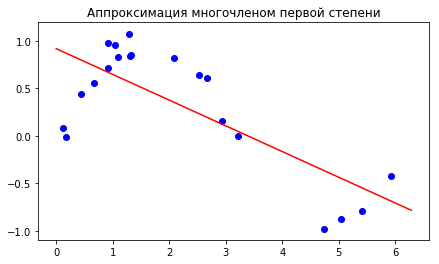

In [3]:
weights_poly_1 = get_weights_of_lin_regression(random_angles_train, Y_train, 1)

plt.figure(figsize=(7, 4))
plt.scatter(random_angles_train, Y_train, c='b')
plot_poly_curve(0, 2*np.pi, weights_poly_1, plot_title='Аппроксимация многочленом первой степени')

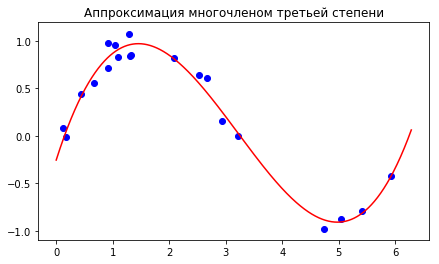

In [4]:
weights_poly_3 = get_weights_of_lin_regression(random_angles_train, Y_train, 3)

plt.figure(figsize=(7, 4))
plt.scatter(random_angles_train, Y_train, c='b')
plot_poly_curve(0, 2*np.pi, weights_poly_3, plot_title='Аппроксимация многочленом третьей степени')

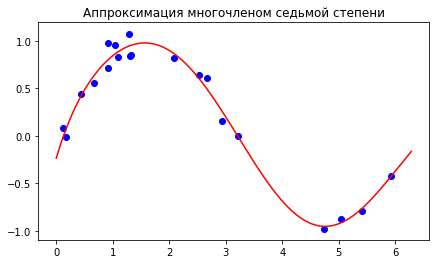

In [5]:
weights_poly_7 = get_weights_of_lin_regression(random_angles_train, Y_train, 7)

plt.figure(figsize=(7, 4))
plt.scatter(random_angles_train, Y_train, c='b')
plot_poly_curve(0, 2*np.pi, weights_poly_7, plot_title='Аппроксимация многочленом седьмой степени')

Многочлен седьмой степени довольно хорошо подстроился по обучающую выборку.
Убедимся, что модель переобучена:

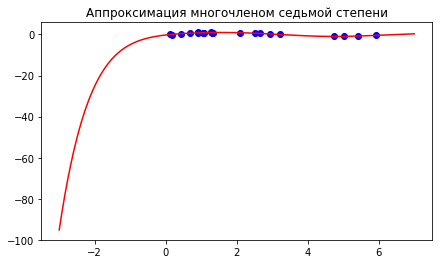

In [6]:
plt.figure(figsize=(7, 4))
plt.scatter(random_angles_train, Y_train, c='b')
plot_poly_curve(-3, 7, weights_poly_7, plot_title='Аппроксимация многочленом седьмой степени')

На значениях, не входящих в отрезок $[0, 2\pi]$ построенная функция совсем не похожа на синус (принимает достаточно большие по модулю значения)

### 3. Validation
The data used to build the final model usually comes from multiple datasets. In particular, three data sets are commonly used in different stages of the creation of the model.

1. We initially fit our parameters on a __training dataset__, that consists of pairs of a feature vector and the corresponding answer. The current model is run with the training dataset and produces a result, which is then compared with the target, for each input vector in the training dataset. Based on the result of the comparison and the specific learning algorithm being used, the parameters of the model are adjusted. The model fitting can include both variable selection and parameter estimation.

2. Second one called the __validation dataset__. The validation dataset provides an unbiased evaluation of a model fit on the training dataset while tuning the model's hyperparameters (e.g. regularization coefficient or number of hidden units in a neural network). Validation datasets can be used for regularization by early stopping: stop training when the error on the validation dataset increases, as this is a sign of overfitting to the training dataset. This simple procedure is complicated in practice by the fact that the validation dataset's error may fluctuate during training. This complication has led to the creation of many ad-hoc rules for deciding when overfitting has truly begun.

3. Finally, the __test dataset__ is a dataset used to provide an unbiased evaluation of a final trained model.

Cross-validation is a validation technique for estimating how accurately a predictive model will perform in practice. The goal of cross validation is to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset.

Cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset and making validation on the other. To reduce variability, multiple rounds of cross-validation are performed using different partitions, and the validation results are caveraged over the rounds to estimate a final predictive model.

There are following types:
1. Leave-p-out cross-validation - using p observations as the validation set with all possible ways.
2. k-fold cross-validation - split data into k folds and using each one as validation set.
3. Holdout validation - randomly split data into training and validation set
4. Repeated random sub-sampling validation - repeatedly make random splits of data into training and validation set

#### Exercises
1. Generate 20 validation samples
2. Check quality of your model on train set and validation set.
3. Have you experienced [overfitting](https://en.wikipedia.org/wiki/Overfitting)?
4. Please, read [this article](https://en.wikipedia.org/wiki/VC_dimension) to learn more about model capacity and VC-dimension.

In [7]:
random_angles_validation = np.random.uniform(0, 2*np.pi, 20)
random_noise = np.random.normal(0, 0.1, 20)

Y_validation = (np.sin(random_angles_validation) + random_noise).reshape((20, 1))

In [8]:
print("Аппроксимация многочленом первой степени")
print("MSE на обучающей выборке:", MSE(
    get_predictions_of_lin_regression(random_angles_train, weights_poly_1),
    Y_train
))
print("MSE на валидационной выборке:", MSE(
    get_predictions_of_lin_regression(random_angles_validation, weights_poly_1),
    Y_validation
))
print("-----------------------------------------")

print("Аппроксимация многочленом третьей степени")
print("MSE на обучающей выборке:", MSE(
    get_predictions_of_lin_regression(random_angles_train, weights_poly_3),
    Y_train
))
print("MSE на валидационной выборке:", MSE(
    get_predictions_of_lin_regression(random_angles_validation, weights_poly_3),
    Y_validation
))
print("-----------------------------------------")

print("Аппроксимация многочленом седьмой степени")
print("MSE на обучающей выборке:", MSE(
    get_predictions_of_lin_regression(random_angles_train, weights_poly_7),
    Y_train
))
print("MSE на валидационной выборке:", MSE(
    get_predictions_of_lin_regression(random_angles_validation, weights_poly_7),
    Y_validation
))
print("-----------------------------------------")

Аппроксимация многочленом первой степени
MSE на обучающей выборке: 0.175954484194
MSE на валидационной выборке: 0.245353833514
-----------------------------------------
Аппроксимация многочленом третьей степени
MSE на обучающей выборке: 0.00811965607368
MSE на валидационной выборке: 0.0227594777403
-----------------------------------------
Аппроксимация многочленом седьмой степени
MSE на обучающей выборке: 0.00708653639029
MSE на валидационной выборке: 0.0137277406339
-----------------------------------------


Если брать только первую степень, то модель получается недообученной и показывает плохие результаты как на обучающей выборке, так и на валидационной.

Модель с добавленными $x^2$ и $x^3$ кажется самой адекватной из трёх. Она показывает среднее качество как на обучающей, так и валидационной выборке.

Если брать до $x^7$ включительно, то можно увидеть сильное переобучение. Это видно по тому, как сильно отличаются результаты на обучении и валидации.

### 4. Binary linear classification
Let $\mathbb{Y} = \{-1, +1\}$ for binary classification. So linear model looks like
$$sign(w^Tx + b),$$
where $w$ is normal to the separating plane, which is defined parametrically $w^Tx+b=0$. In the half-space, which normal is directed, all points has class +1, otherwise -1. Let's assume that all points of hyperplane has class +1 to resolve the ambiguity. Also we rewrite model in the short variant $sign(w^Tx)$.

As with regression, training of linear classifier may be reduced to an optimization problem. We only have to specify the loss function. The most nature option is
$$\mathcal{L}(y_{pred}, y_{true}) = [y_{pred} \neq y_{true}] = [M < 0],$$
where $M$ is the margin value $yw^Tx$, which indicates how far the classifier puts a point in its class. But this loss has one drawback, it's not differentiable. That's why the optimization problem becomes very complex. However we can use any other function, which majorizes this loss. You can find some popular options below

1. MSE has one big advantage, we optimize convex function with a local minimum. Moreover analytic solution exists.
$$\big(w^Tx - y \big)^2$$

2. Hinge loss function makes our linear classifier [SVM](https://en.wikipedia.org/wiki/Support_vector_machine) (support vector machine).
$$max \big(0, 1 - yw^Tx \big)$$

3. Logistic loss function has a probabilistic meaning. In particular, this loss leads us to the optimal [Bayesian classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) under certain assumptions on the distribution of features. But it's a different story. So it is often used in practice.
$$\ln \big( 1 + \exp(-yw^Tx) \big)$$

#### Exercises
1. Let $\mathbb{P}\{y=1|x\} = \sigma(wx)$, where $\sigma(z) = \frac{1}{1 + \exp(-z)}$. Show that problem below it is nothing like the maximization of the likelihood.
$$\arg\min_{w}Q(w) = \arg\min_{w} \sum_{x, y} \ln \big(1 + \exp(-yw^Tx )) \big)$$
2. Plot all loss functions in the axes $M \times L$.
3. Generate two normally distributed sets of points on the plane.
4. Let points of 1th set (red color) have class +1 and point of 2d set (blue color) have -1.
5. Train linear classifier with MSE (use analytical solution), which splits these sets.
6. Plot points and separating line of trained classifier.
7. What is time comlexity of your solution?

In [9]:
#TODO доказать утверждение

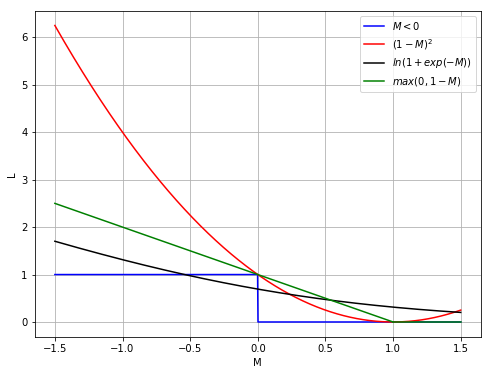

In [10]:
M = np.linspace(-1.5, 1.5, 1000)

plt.figure(figsize=(8, 6))
plt.xlabel('M')
plt.ylabel('L')
plt.plot(M, [1]*500 + [0]*500, c='b')
plt.plot(M, (1 - M)**2, c='r')
plt.plot(M, np.log(1+np.exp(-M)), c='black')
plt.plot(np.linspace(-1.5, 1, 1000), 1 - np.linspace(-1.5, 1, 1000), c='g')
plt.plot(np.linspace(1, 1.5, 1000), [0]*1000, c='g')
plt.legend(["$M < 0$", "$(1-M)^2$", "$ln(1+exp(-M))$", "$max(0, 1-M)$"])
plt.ylabel
plt.grid()

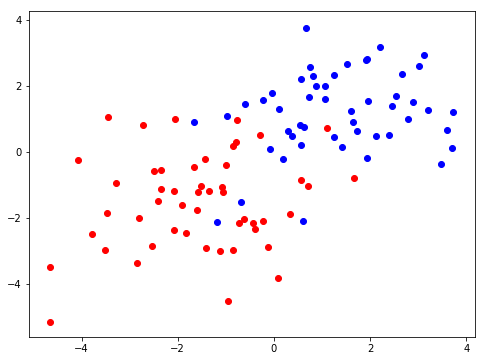

In [11]:
center_of_first_set = [-1.5, -1.5]
center_of_second_set = [1.5, 1.5]
POINTS_IN_SET = 50

X_first_set = np.random.normal(center_of_first_set[0], 1.5, POINTS_IN_SET).reshape((POINTS_IN_SET, 1))
Y_first_set = np.random.normal(center_of_first_set[1], 1.5, POINTS_IN_SET).reshape((POINTS_IN_SET, 1))

X_second_set = np.random.normal(center_of_second_set[0], 1.5, POINTS_IN_SET).reshape((POINTS_IN_SET, 1))
Y_second_set = np.random.normal(center_of_second_set[1], 1.5, POINTS_IN_SET).reshape((POINTS_IN_SET, 1))

plt.figure(figsize=(8, 6))
plt.scatter(X_first_set, Y_first_set, c='r')
plt.scatter(X_second_set, Y_second_set, c='b')

In [12]:
X_points = np.concatenate((X_first_set, X_second_set), axis=0)
Y_points = np.concatenate((Y_first_set, Y_second_set), axis=0)
points_train_data = np.concatenate((X_points, Y_points), axis=1)
points_train_labels = np.concatenate((np.ones(POINTS_IN_SET), -1*np.ones(POINTS_IN_SET)), axis=0)
points_train_labels = points_train_labels.reshape((len(points_train_labels)), 1)
divided_line = get_weights_of_lin_classifier(points_train_data, points_train_labels)
points_train_data = np.concatenate((points_train_data, np.ones((points_train_data.shape[0], 1))), axis=1)

$\alpha x+\beta y+\gamma=0 \Rightarrow$
$y= {{-\gamma-\alpha x}\over{\beta}}$

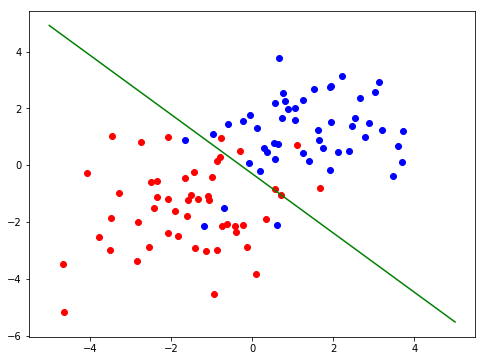

In [13]:
alpha = divided_line[0]
beta = divided_line[1]
gamma = divided_line[2]

plt.figure(figsize=(8, 6))
plt.scatter(X_first_set, Y_first_set, c='r')
plt.scatter(X_second_set, Y_second_set, c='b')
plt.plot(np.linspace(-5, 5, 1000), -gamma/beta-(alpha/beta)*np.linspace(-5, 5, 1000), c='g')

Оценим сложность:

Пусть $X$ - это матрица размера $(n, m)$, $y$ - вектор длины $n$

Чтобы найти $w$ нужно сначала умножить матрицу размера $(m, n)$ на $(n, m)$ (сложность $O(mn^2)$). Затем нужно обратить матрицу размера $(m, m)$ (сложность $O(m^3)$). Потом умножить матрицу размера $(m, m)$ на $(m, n)$ (сложность $O(m^2n)$). Последним будет умножение на вектор длины $m$ (сложность $O(mn)$)

Итого $O(mn^2+m^3)$

### 5. Gradient descent
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient of the function at the current point. Gradient descent is based on the observation that if function $Q(x)$ is defined and differentiable in a neighborhood of a point $x$, then $Q(x)$ decreases fastest if one goes from $x$  in the direction of the negative gradient.

$$x^{k+1} = x^{k} - \lambda \cdot \triangledown Q(x)$$

Here $\lambda$ is step of descent and  $k$ – step number. If $\lambda$ is too large then algorithm may not converge, otherwise training can last a long time. Also there is rather popular hack to slowly decrease $\lambda$ with each step. You need to understand that gradient descent finds exactly local minimum. The easiest way to fight this problem is make several runs of algorithm or have good initialization.

#### Exercises
1. Suggest some quadratic function $Q: \mathbb{R}^2 \rightarrow \mathbb{R}$ with global minimum.
2. Find minimum with gradient descent method.
3. Plot contour lines.
4. Trace the path of gradient descent.
5. How do you choose $\lambda$?
6. Evaluate time complexity of solution.

$Q(x, y)=5x^2 + y^2+xy-5y$

$\triangledown Q(x) = \begin{pmatrix} 10x + y \\ x +2y - 5 \end{pmatrix}$

Минимум значения этой функции достигается при $x=\frac{-5}{19}$ $y=\frac{50}{19}$

In [14]:
def Q(point):
    return 5 * (point[0]**2) + point[1]**2 + point[0] * point[1] - 5 * point[1]

def grad_Q(point):
    x_grad = 10 * point[0] + point[1]
    y_grad = point[0] + 2 * point[1] - 5
    return np.array((x_grad, y_grad))

In [15]:
ANALYTICAL_SOLUTION = np.array((-5./19, 50/19))

def grad_descent(f, grad, x_init, max_iter_n=1000, grad_eps=1e-6):
    curr_point = x_init
    trace = [curr_point]
    learning_rate = 0.4
    for i in range(max_iter_n):
        curr_point = curr_point - (learning_rate / (i + 1)) * grad(curr_point)
        trace.append(curr_point)
        if np.linalg.norm(grad(curr_point)) < grad_eps:
            break
    return trace

In [16]:
start_point = np.array((np.random.randint(-50, 50), np.random.randint(-50, 50)))
trace = grad_descent(Q, grad_Q, start_point)

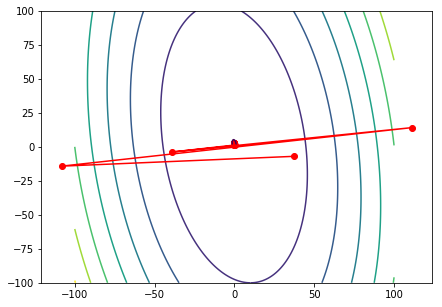

In [17]:
X = np.arange(-100, 100, 0.1)
Y = np.arange(-100, 100, 0.1)
X, Y = np.meshgrid(X, Y)
Z = Q((X, Y))

plt.figure(figsize=(7, 5))
plt.contour(X, Y, Z)
plt.scatter(*zip(*trace), color='red')
plt.plot(*zip(*trace), color='red')

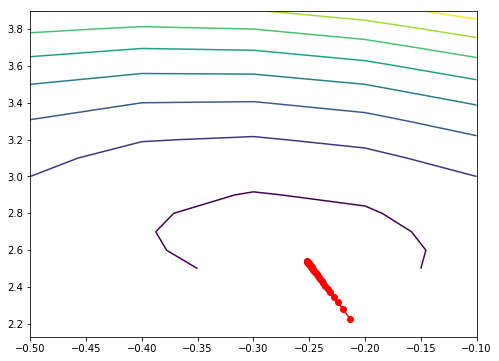

In [18]:
# Посмотрим на поведение возле минимума
X = np.arange(-0.5, 0, 0.1)
Y = np.arange(2.5, 4, 0.1)
X, Y = np.meshgrid(X, Y)
Z = Q((X, Y))

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z)
plt.scatter(*zip(*trace[20:150:4]), color='red')
plt.plot(*zip(*trace[20:150]), color='red')

Изначально я взял $\lambda=0.4$. Затем на каждом шаге градиентного спуска $\lambda$ делилась на номер текущей итерации. Такой способ показал неплохой результат и алгоритм сошёлся менее чем за 20 итераций.

Не очень понятно, что в каком случае нужно оценить сложность градиентного спуска. Если для функции, данной выше, то сложность будет $O(k)$, где k - это количество шагов градиентного спуска. Если в требуется в общем случае оценить сложность, то не очень понятно, как это можно сделать, ведь функция ошибки может иметь сложный вид и неизвестно, за сколько считается её градиент. Если есть $n$ объектов в обучающей выборке с $m$ признаками, то можно дать такую оценку - $O(k(m + mnT(grad)))$ , где $T(grad)$ - сложность вычисления частной прозводной на одном векторе 

There is category of function which naive gradient descent works poorly for, e.g. [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function).
$$f(x, y) = (1-x)^2 + 100(y-x^2)^2.$$

#### Exercises
1. Repeat previous steps for Rosenbrock function.
2. What problem do you face?
3. Is there any solution?

$\triangledown f(x) = \begin{pmatrix} 400x^3-400xy-2x-2 \\ 200y-200x^2 \end{pmatrix}$

Минимум значения функции достигается в точке $(0, 0)$

In [19]:
def grad_rosenbrock(point):
    grad_x = 400 * (point[0]**3) - 400 * point[0] * point[1] + 2 * point[0] - 2
    grad_y = 200 * point[1] - 200 * (point[0]**2)
    return np.array((grad_x, grad_y))
    
def rosenbrock_func(point):
    return (1 - point[0])**2 + 100 * (point[1] - (point[0]**2))**2

Попробовал запустить такой же градиентный спуск для функции Розенброка, но при стартовом $\lambda=0.4$ алгоритм выдавал неадекватные результаты. Это было связано с тем, что стартовая точка была не близка к единице, и поэтому модуль градиента в ней был большой. Алгоритм делал шаг в сторону минимума, но "перешагивал" его и приходил в точку с еще большими значениями координат(по модулю). Так с каждым шагом алгоритм перешагивал минимум и уходил всё дальше от него. Требовался подход, который не допускал бы большие значения градиента.

Самым результативным подходом к выбору learning rate оказался подход, в котором $\lambda$ зависела от модуля градиента - чем меньше он был, тем больше была $\lambda$. Такой метод показал хорошее качество, однако, из-за того, что возле глобального минимума модуль градиента близок к нулю, алгоритм часто "выпрыгивал" из глобального оптимума и хаотично прыгал в его окрестности (с радиусом, близким к 1)

In [20]:
start_point = np.array((np.random.randint(-20, 20), np.random.randint(-20, 20)))
rosenbrock_trace = grad_descent(rosenbrock_func, grad_rosenbrock, start_point)
#  Уже к четвертой итерации получаем неадекватные значения

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
def grad_descent_normalized(f, grad, x_init, max_iter_n=1000):
    curr_point = x_init
    trace = [curr_point]
    for i in range(max_iter_n):
        learning_rate = 1.0/(np.linalg.norm(grad(curr_point)))
        curr_point = curr_point - learning_rate * grad(curr_point)
        last_delta = sum(abs(learning_rate * grad_rosenbrock(curr_point)))
        trace.append(curr_point)
    return trace

rosenbrock_trace = grad_descent_normalized(rosenbrock_func, grad_rosenbrock, start_point)

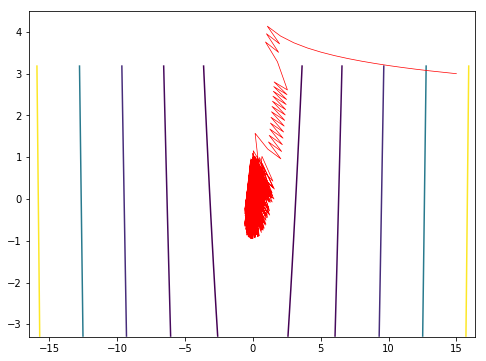

In [22]:
X = np.arange(-1.1*abs(start_point[0]), 1.1*abs(start_point[0]), 0.1)
Y = np.arange(-1.1*abs(start_point[1]), 1.1*abs(start_point[1]), 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock_func((X, Y))

plt.figure(figsize=(8, 6))
levels = np.arange(0, 200, 10)**4
plt.contour(X, Y, Z, levels)
plt.plot(*zip(*rosenbrock_trace), color='red', linewidth=0.7)

There are some variations of the method, for example steepest descent, where we find optimal $\lambda$ for each step.
$$\lambda^{k} = \arg\min_{\lambda}Q(x_k - \lambda\triangledown Q(x_k)).$$

#### Exercises
1. Split red and blue sets of points again. Train linear model using gradient descent and MSE.
2. Plot your splitting line. Compare with analytical solution.
3. Try steepest descent.
4. Comare gradient descent methods and show its convergence in axes $[step \times Q]$.

$Q = $$\frac{1}{l}\big(Xw - y \big)^2$

$\triangledown Q = \frac{2}{l}X^T\big(Xw - y \big)$

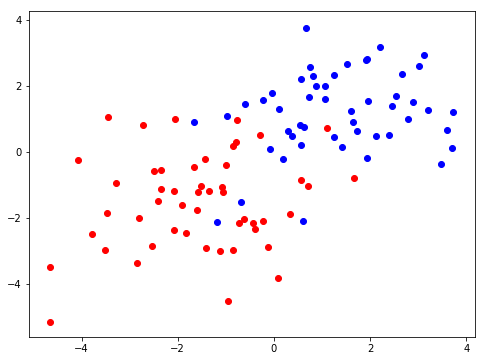

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X_first_set, Y_first_set, c='r')
plt.scatter(X_second_set, Y_second_set, c='b')

$Q(w-\lambda\triangledown Q(x)) = \frac{1}{l}(X(w-\lambda\triangledown Q(x))-y)^2$

$\frac{dQ}{d\lambda} = \frac{-2}{l}(Xw-\lambda X\triangledown Q(x) - y)(X\triangledown Q(x))$

$\lambda = \frac{XwX\triangledown Q(x) - yX\triangledown Q(x)}{(X\triangledown Q(x))^2}$

In [24]:
def MSE_grad(X, Y, w):
    return 2 * np.dot(X.T, (np.dot(X, w) - Y)) / X.shape[0]

def best_learning_rate(X, Y, w):
    grad = MSE_grad(X, Y, w)
    denominator = np.dot(np.dot(X, grad).T, np.dot(X, grad))
    numerator_1 = np.dot(np.dot(X, w).T, np.dot(X, grad))
    numerator_2 = np.dot(-Y.T, np.dot(X, grad))
    return (numerator_1 + numerator_2) / denominator

def grad_descent_common(grad, w_init, X, Y, max_iter_n=100, grad_eps=1e-6):
    w = w_init
    steps = [0]
    MSE_scores = [MSE(np.dot(X, w), points_train_labels)]
    start_learning_rate = 0.1
    for i in range(1, max_iter_n):
        learning_rate = start_learning_rate / (i + 1)
        w = w - learning_rate * grad(X, Y, w)
        steps.append(i)
        MSE_scores.append(MSE(np.dot(X, w), Y))
    return w, steps, MSE_scores

def grad_descent_steepest(grad, w_init, X, Y, max_iter_n=100, grad_eps=1e-6):
    w = w_init
    steps = [0]
    MSE_scores = [MSE(np.dot(X, w), points_train_labels)]
    for i in range(1, max_iter_n):
        learning_rate = best_learning_rate(X, Y, w)
        w = w - learning_rate * grad(X, Y, w)
        steps.append(i)
        MSE_scores.append(MSE(np.dot(X, w), Y))
    return w, steps, MSE_scores

Можно было бы нарисовать разделяющую прямую, найденную аналитически в предыдущих заданях, но выглядит это не очень, так как прямые накладываются

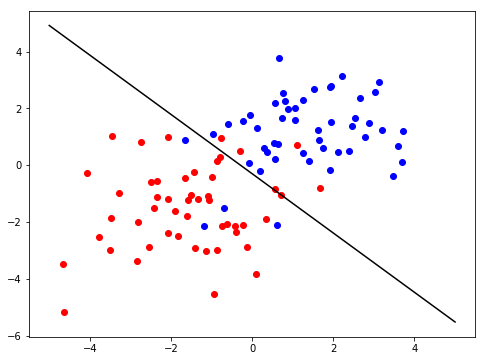

In [25]:
w_steepest_secent, steps_steepest_descent, MSE_scores_steepest_descent = grad_descent_steepest(
    MSE_grad, 
    np.ones((3, 1)),
    points_train_data,
    points_train_labels
)

alpha_grad = w_steepest_secent[0]
beta_grad = w_steepest_secent[1]
gamma_grad = w_steepest_secent[2]

plt.figure(figsize=(8, 6))
plt.scatter(X_first_set, Y_first_set, c='r')
plt.scatter(X_second_set, Y_second_set, c='b')
plt.plot(
    np.linspace(-5, 5, 1000),
    -gamma_grad / beta_grad - (alpha_grad / beta_grad) * np.linspace(-5, 5, 1000), 
    c='black'
)

In [26]:
w_common_decent, steps_common_descent, MSE_scores_common_descent = grad_descent_common(
    MSE_grad, 
    np.ones((3, 1)),
    points_train_data,
    points_train_labels
)

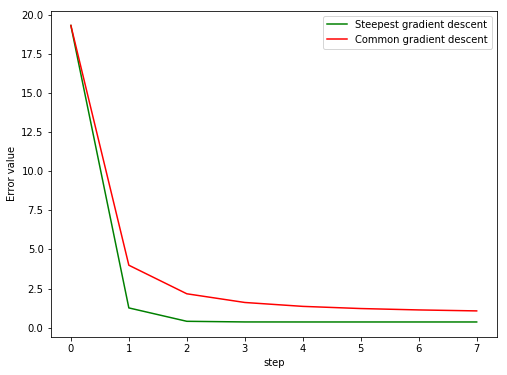

In [27]:
plt.figure(figsize=(8, 6))
plt.xlabel('step')
plt.ylabel('Error value')

plt.plot(
    steps_steepest_descent[:8], 
    MSE_scores_steepest_descent[:8], 
    c='g', 
    label='Steepest gradient descent'
)
plt.plot(
    steps_common_descent[:8], 
    MSE_scores_common_descent[:8], 
    c='r', 
    label='Common gradient descent'
)
plt.legend()

### 6. Stochastic gradient descent

Sometimes you have so huge amount of data, that usual gradient descent becomes too slow. One more option, we have deal with data flow. In this case stochastic gradient method appears on the stage. The idea is simple. You can do a descent step, calculating error and gradient not for all samples, but for some small batch only.

#### Еxercises
1. Download [mnist](https://www.kaggle.com/c/digit-recognizer).
2. Train linear classificator for digits 0 and 1, using logistic loss function and stochastic gradient descent.
3. Use holdout to check [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) of classification.
4. How do accuracy and training time depend on bathch size?
5. Plot graphic that proves your words.
6. How many epochs you use? Why?
7. Plot value of loss function for each step (try use [exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)).

In [28]:
mnist_raw_data = np.genfromtxt('/Users/Victor/Downloads/train-2.csv', delimiter=',', skip_header=1)

In [29]:
mnist_labels = []
mnist_data = []
for row in mnist_raw_data:
    if row[0] == 0 or row[0] == 1:
        mnist_data.append(row[1:])
        mnist_labels.append(row[0])
mnist_data = np.array(mnist_data)
# Add bias
mnist_data = np.concatenate((mnist_data, np.ones((mnist_data.shape[0], 1))), axis=1)

mnist_data = (mnist_data - mnist_data.mean()) / mnist_data.max()

mnist_labels = np.array(mnist_labels).reshape((mnist_data.shape[0], 1))

mnist_labels[mnist_labels == 1] = -1
mnist_labels[mnist_labels == 0] = 1

mnist_train_data = mnist_data[:7000]
mnist_validation_data = mnist_data[7000:]
mnist_train_labels = mnist_labels[:7000]
mnist_validation_labels = mnist_labels[7000:]

In [329]:
def split_in_batches(X, Y, batch_size):
    X_batches = []
    Y_batches = []
    n_batches = int(X.shape[0] / batch_size)
    for i in range(n_batches):
        X_batches.append(X[i * batch_size : (i + 1) * batch_size])
        Y_batches.append(Y[i * batch_size : (i + 1) * batch_size])
    return np.array(X_batches), np.array(Y_batches), n_batches

def log_loss(X, Y, w):
    return np.log(1 + np.exp(-np.dot(Y.T, np.dot(X, w)))) / X.shape[0]

def grad_log_loss(X, Y, w):
    return -np.dot(X.T, Y) / X.shape[0]
   
def stoch_grad_descent(grad, w_init, X, Y, batch_size=20, n_epochs=2, learning_rate = 0.001):
    start_time = time.time()
    w = w_init
    X_splited, Y_splited, n_batches = split_in_batches(X, Y, batch_size)
    for i in range(n_epochs):
        for curr_batch in range(n_batches):
            w = w - learning_rate * grad(X_splited[curr_batch], Y_splited[curr_batch], w)
    return w, time.time() - start_time

def smooth_loss(X, Y, w, last_score, smoothing_factor):
    return smoothing_factor * log_loss(X, Y, w) + (1 - smoothing_factor) * last_score

def stoch_grad_descent_smoothing(grad, w_init, X, Y, batch_size=20, n_epochs=2, smoothing_factor = 0.7, learning_rate = 0.001):
    start_time = time.time()
    w = w_init
    X_splited, Y_splited, n_batches = split_in_batches(X, Y, batch_size)
    log_loss_scores = [log_loss(X, Y, w)]
    for i in range(n_epochs):
        for curr_batch in range(n_batches):
            log_loss_scores.append(
                smooth_loss(
                    X_splited[curr_batch], 
                    Y_splited[curr_batch], 
                    w, 
                    log_loss_scores[-1], 
                    smoothing_factor
                )
            )
            w -= learning_rate * grad(X_splited[curr_batch], Y_splited[curr_batch], w)
    return w, np.array(log_loss_scores)

def accuracy_train(weights):
    predictions_train =  np.dot(mnist_train_data, weights)
    predictions_train[predictions_train >= 0] = 1
    predictions_train[predictions_train < 0] = -1
    return accuracy_score(predictions_train, mnist_train_labels)

def accuracy_validation(weights):
    predictions_validation =  np.dot(mnist_validation_data, weights)
    predictions_validation[predictions_validation >= 0] = 1
    predictions_validation[predictions_validation < 0] = -1
    return accuracy_score(predictions_validation, mnist_validation_labels)

In [330]:
weights_mnist, spent_time = stoch_grad_descent(
    grad_log_loss,
    np.zeros((mnist_train_data.shape[1], 1)),
    mnist_train_data,
    mnist_train_labels,
)

print("Точность классификации с использованием стохастического \
градиентного спуска с параметрами по умолчанию:")
print("На обучающей выборке:", accuracy_train(weights_mnist))
print("На валидационной выборке:", accuracy_validation(weights_mnist))

Точность классификации с использованием стохастического градиентного спуска с параметрами по умолчанию:
На обучающей выборке: 0.996428571429
На валидационной выборке: 0.995594713656


In [32]:
batch_size_space = np.arange(1, 200, 1)
batch_spent_time = []
batch_accuracy_train = []
batch_accuracy_validation = []
for b_size in batch_size_space:
    curr_weights, curr_spent_time = stoch_grad_descent(
        grad_log_loss,
        np.zeros((mnist_train_data.shape[1], 1)),
        mnist_train_data,
        mnist_train_labels,
        batch_size = b_size
    )
    batch_spent_time.append(curr_spent_time)
    batch_accuracy_train.append(accuracy_train(curr_weights))
    batch_accuracy_validation.append(accuracy_validation(curr_weights))   

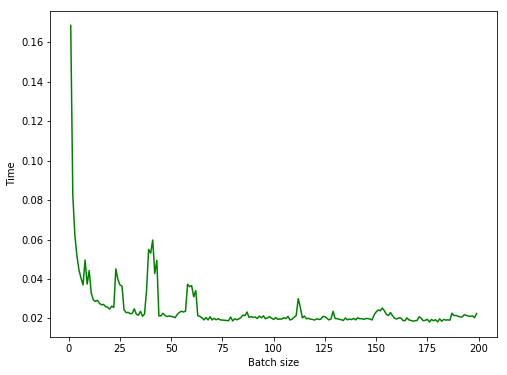

In [33]:
plt.figure(figsize=(8, 6))
plt.xlabel('Batch size')
plt.ylabel('Time')
plt.plot(batch_size_space, batch_spent_time, c='g')

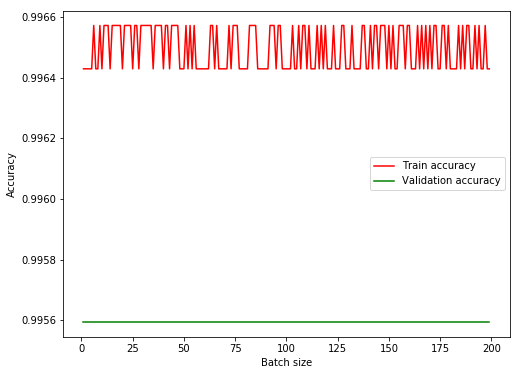

In [34]:
plt.figure(figsize=(8, 6))
plt.xlabel('Batch size')
plt.ylabel('Accuracy')
plt.plot(batch_size_space, batch_accuracy_train, c='r', label='Train accuracy')
plt.plot(batch_size_space, batch_accuracy_validation, c='g', label='Validation accuracy')
plt.legend()

При всех размерах батча алгоритм показал примерно одинаковое качество. Во всех случаях алгоритм сходился к одним и тем же весам и точность получалась почти во всех случаях одинаковая.

При маленьких размерах батча время выполнения алгоритма было существенно больше, чем при больших размерах батчей. Я думаю, это связано с оптимизацией матричных вычислений в numpy.

In [35]:
# Оценим, как влияет количество эпох на сходимость
epochs_space = np.arange(1, 10, 1)
epochs_accuracy_train = []
epochs_accuracy_validation = []
for n_ep in epochs_space:
    curr_weights, _ = stoch_grad_descent(
        grad_log_loss,
        np.zeros((mnist_train_data.shape[1], 1)),
        mnist_train_data,
        mnist_train_labels,
        n_epochs = n_ep
    )
    epochs_accuracy_train.append(accuracy_train(curr_weights))
    epochs_accuracy_validation.append(accuracy_validation(curr_weights))  

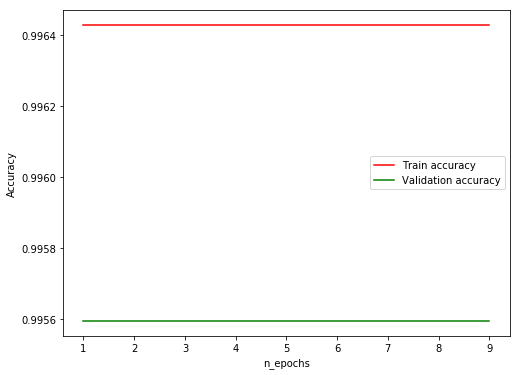

In [36]:
plt.figure(figsize=(8, 6))
plt.xlabel('n_epochs')
plt.ylabel('Accuracy')
plt.plot(epochs_space, epochs_accuracy_train, c='r', label='Train accuracy')
plt.plot(epochs_space, epochs_accuracy_validation, c='g', label='Validation accuracy')
plt.legend()

Видно, что алгоритму достаточно одной эпохи.

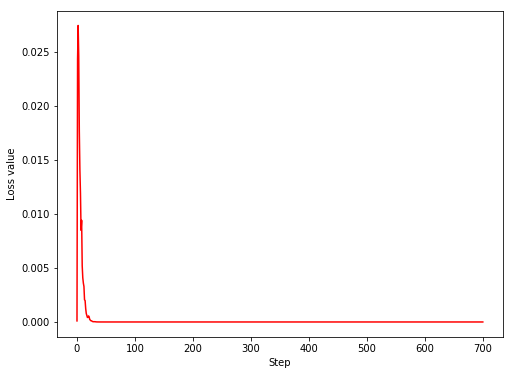

In [37]:
_, loss_scores = stoch_grad_descent_smoothing(
        grad_log_loss,
        np.zeros((mnist_train_data.shape[1], 1)),
        mnist_train_data,
        mnist_train_labels,
    )

plt.figure(figsize=(8, 6))
plt.xlabel('Step')
plt.ylabel('Loss value')
plt.plot(loss_scores[:, 0, 0], c='r')

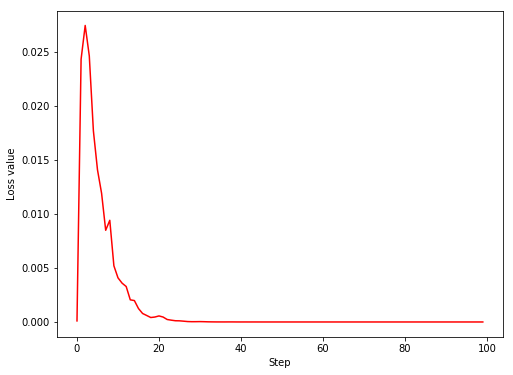

In [38]:
plt.figure(figsize=(8, 6))
plt.xlabel('Step')
plt.ylabel('Loss value')
plt.plot(loss_scores[:100, 0, 0], c='r')

#### Momentum method
Stochastic gradient descent with momentum remembers the update of $x$ at each iteration, and determines the next update as a linear combination of the gradient and the previous update
$$x^{k+1} = x^{k} - s^{k},$$ where $s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k)$, $0 <\gamma < 1$ – smoothing ratio and $s^{-1} = 0$.

#### Еxercises
1. Find minimum for $Q(x,y)=10x^2+y^2$ with descent method.
2. Use momentum method and compare pathes.
3. How do you choose $\gamma$?

In [56]:
def Q2(point):
    return 10 * point[0]**2 + point[1]**2

def grad_Q2(point):
    x_grad = 20 * point[0]
    y_grad = 2 * point[1]
    return np.array((x_grad, y_grad))

def momentum_grad_descent(func, grad, x_init, max_iter_n=1000, learning_rate=0.01, smoothing_ratio=0.5):
    curr_point = x_init
    smooth_values = [learning_rate * grad(curr_point)]
    trace = [curr_point]
    for i in range(max_iter_n):
        smooth_values.append(smoothing_ratio * smooth_values[-1] + learning_rate * grad(curr_point))
        curr_point = curr_point - smooth_values[-1]
        trace.append(curr_point)
    return trace

In [60]:
init_point = np.array(np.random.randint(0, 50, 2))

trace_Q2_common_descent = grad_descent(Q2, grad_Q2, init_point)

trace_Q2_momentum_descent = momentum_grad_descent(Q2, grad_Q2, init_point)

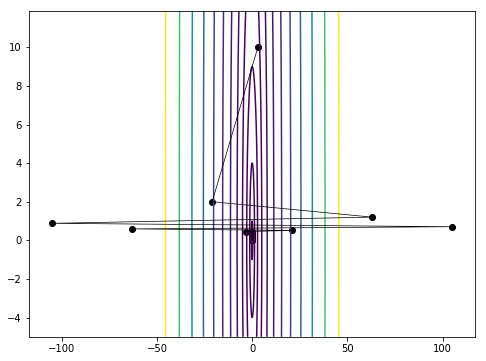

In [73]:
X = np.arange(-50, 50, 0.1)
Y = np.arange(-5, 12, 0.1)
X, Y = np.meshgrid(X, Y)
Z = Q2((X, Y))

plt.figure(figsize=(8, 6))
levels = np.arange(0, 20, 1)**4
plt.contour(X, Y, Z, levels)
plt.plot(*zip(*trace_Q2_common_descent), color='black', linewidth=0.7)
plt.scatter(*zip(*trace_Q2_common_descent), color='black')

Видно, что обычный градиентный спуск в самом начале далеко уходил от оптимума. Он сошёлся только к 15-25 итерации.


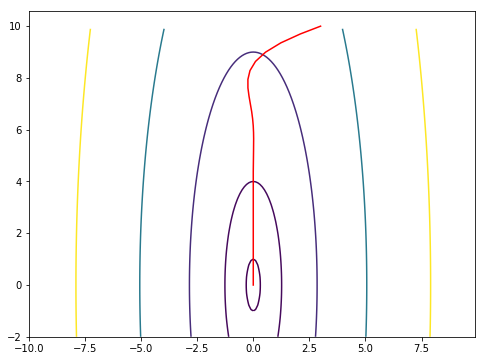

In [78]:
X = np.arange(-10, 10, 0.1)
Y = np.arange(-2, 10, 0.1)
X, Y = np.meshgrid(X, Y)
Z = Q2((X, Y))

plt.figure(figsize=(8, 6))
levels = np.arange(0, 20, 1)**4
plt.contour(X, Y, Z, levels)

plt.plot(*zip(*trace_Q2_momentum_descent), color='red')

Почти при всех разумных (не сильно удалённых от 0.5) значениях $\gamma$ алгоритм достаточно быстро и плавно сходился к оптимуму

При значениях близких к 1 алгоритм вёл себя достаточно нестабильно(но все-равно сошелся за 100 итераций)

При значениях близких к 0 алгоритм очень долго сходился

Поэтому логичнее всего брать $\gamma$ от 0.4 до 0.6

1001


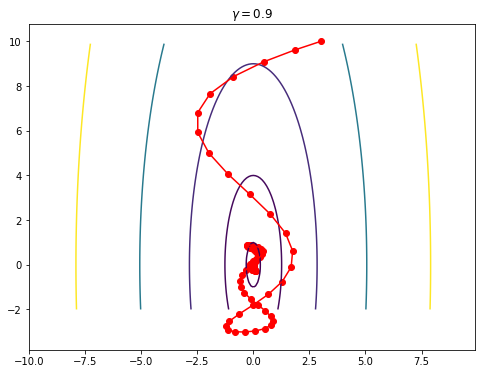

In [88]:
trace_Q2_very_smoothed = momentum_grad_descent(Q2, grad_Q2, init_point, smoothing_ratio=0.9)

plt.figure(figsize=(8, 6))
plt.title("$\gamma=0.9$")
plt.contour(X, Y, Z, levels)
plt.plot(*zip(*trace_Q2_very_smoothed), color='red')
plt.scatter(*zip(*trace_Q2_very_smoothed), color='red')
print(len(trace_Q2_very_smoothed))

1001


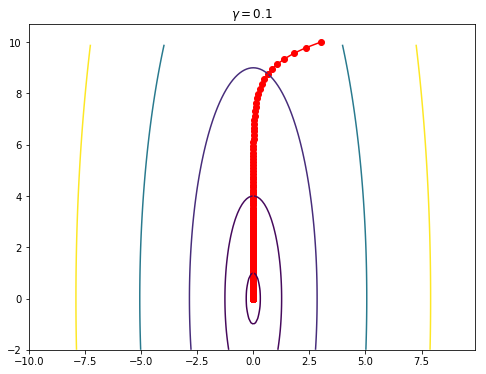

In [90]:
trace_Q2_not_smoothed = momentum_grad_descent(Q2, grad_Q2, init_point, smoothing_ratio=0.1)

plt.figure(figsize=(8, 6))
plt.title("$\gamma=0.1$")
plt.contour(X, Y, Z, levels)
plt.plot(*zip(*trace_Q2_not_smoothed), color='red')
plt.scatter(*zip(*trace_Q2_not_smoothed), color='red')
print(len(trace_Q2_not_smoothed))

#### Nesterov accelerated gradient
And the logical development of this approach leads to the accelerated Nesterov's gradient. The descent step is calculated a little differently
$$s^k = \gamma s^{k-1} + \lambda\triangledown Q(x^k - \gamma s^{k-1}),$$
so we find gradient at the point which moment will move us.

#### Еxercises
1. Compare this method and previous with Rosenbrock function.
2. Plot traces of both algorithms.

In [91]:
def Nesterov_grad_descent(func, grad, x_init, max_iter_n=1000, learning_rate=0.01, smoothing_ratio=0.5):
    curr_point = x_init
    smooth_values = [learning_rate * grad(curr_point)]
    trace = [curr_point]
    for i in range(max_iter_n):
        next_point = curr_point - smoothing_ratio * smooth_values[-1]
        smooth_values.append(smoothing_ratio * smooth_values[-1] + learning_rate * grad(next_point))
        curr_point = curr_point - smooth_values[-1]
        trace.append(curr_point)
    return trace

In [94]:
Rosenbrock_init_point = np.random.randint(-10, 10, 2)
trace_Rosenbrock_with_Nesterov_descent = Nesterov_grad_descent(
    rosenbrock_func,
    grad_rosenbrock,
    Rosenbrock_init_point,
    learning_rate = 0.00001
)

trace_Rosenbrock_normalized_descent = grad_descent_normalized(
    rosenbrock_func, 
    grad_rosenbrock,
    Rosenbrock_init_point
)

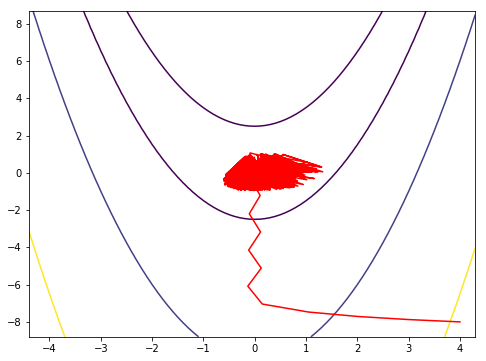

In [98]:
X = np.arange(-1.1*abs(Rosenbrock_init_point[0]), 1.1*abs(Rosenbrock_init_point[0]), 0.1)
Y = np.arange(-1.1*abs(Rosenbrock_init_point[1]), 1.1*abs(Rosenbrock_init_point[1]), 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock_func((X, Y))

plt.figure(figsize=(8, 6))
levels = np.arange(0, 200, 5)**4
plt.contour(X, Y, Z, levels)
plt.plot(*zip(*trace_Rosenbrock_normalized_descent), color='red')

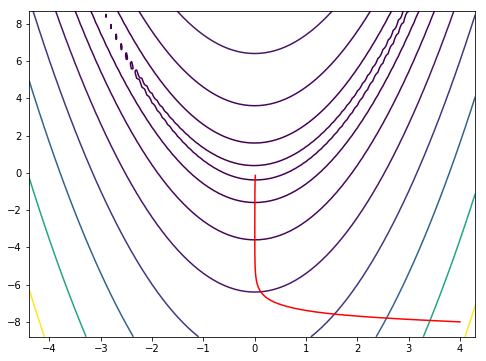

In [104]:
X = np.arange(-1.1*abs(Rosenbrock_init_point[0]), 1.1*abs(Rosenbrock_init_point[0]), 0.1)
Y = np.arange(-1.1*abs(Rosenbrock_init_point[1]), 1.1*abs(Rosenbrock_init_point[1]), 0.1)
X, Y = np.meshgrid(X, Y)
Z = rosenbrock_func((X, Y))

plt.figure(figsize=(8, 6))
levels = np.arange(0, 200, 2)**4
plt.contour(X, Y, Z, levels)
plt.plot(*zip(*trace_Rosenbrock_with_Nesterov_descent), color='red')

#### Adagrad (2011)
Adaptive gradient finds lambda for each dimension of the input vector x. Informally speaking, for sparce features it makes a bigger step, but for regular ones smaller step.
$$x_{i}^{k + 1} = x_{i}^{k} - \frac{\lambda}{\sqrt{G_{i, i}^k } + \varepsilon} \cdot \frac{\partial Q}{\partial x_i}(x^k),$$
* $G^{k} = \sum_{t=1}^{k}g_t g_t^{T}$, где $g_t = \triangledown Q(x^t)$.
* $\varepsilon$ - epsilon to avoid division by zero.
It improves convergence of the learning process (e.g. when using neural networks for text).

#### RMSprop
To avoid growth of the denominator we can use the following modification. Let's calculate the matrix $G^k$ only for a small number of latest steps, it can be done for example using exponential smoothing.
$$G^{k+1} = \gamma G^{k} + (1 - \gamma)g_{k+1}g_{k+1}^{T},$$
where $0< \gamma < 1$ - smoothing factor

#### Еxercises
1. Read about adadelta and adam (links below).
2. Give an example of a function that can show the difference in the studied stohastic gradient methods.
3. Show animation step by step how methods work.
4. Use your favorite method on mnist dataset again.
5. Show convergence of alrotigthm.
6. Check quality, using holdout.

#### Papers
1. [Adadelta (2012)](https://arxiv.org/pdf/1212.5701.pdf)
2. [Adam (2015)](https://arxiv.org/pdf/1412.6980.pdf)

In [301]:
def shift_adagrad(grad, point):
    epsilon = 1e-10
    gradient_vector = np.array(grad(point)).reshape((point.shape[0], 1))
    G_matrix = np.dot(gradient_vector, gradient_vector.T)
    shift = []
    for i in range(point.shape[0]):
        shift.append(float(gradient_vector[i]) / (np.sqrt(G_matrix[i][i]) + epsilon))
    return np.array(shift)


def adagrad(func, grad, x_init, max_iter_n=1000, learning_rate=0.4):
    curr_point = x_init
    trace = [curr_point]
    for i in range(max_iter_n):
        curr_point = curr_point - learning_rate * shift_adagrad(grad, curr_point)
        trace.append(curr_point)
    return trace

def adadelta(func, grad, x_init, max_iter_n=20000, decay_rate=0.95, epsilon=1e-3):
    expected_gradient = 0
    expected_delta = 0
    curr_point = x_init
    trace = [curr_point]
    for i in range(max_iter_n):
        curr_grad = grad(curr_point)
        expected_gradient = decay_rate * expected_gradient + (1 - decay_rate) * np.dot(curr_grad, curr_grad.T)
        shift = -np.sqrt(expected_delta + epsilon) / np.sqrt(expected_gradient + epsilon) * curr_grad
        expected_delta = decay_rate * expected_delta + (1 - decay_rate) * np.dot(shift, shift.T)
        curr_point = curr_point + shift
        trace.append(curr_point)
    return trace

def adam(func, grad, x_init, max_iter_n=20000, decay_rate1=0.9, decay_rate2=0.999, learning_rate=0.01, epsilon=1e-8):
    expected_grad = 0
    expected_norm_grad = 0
    curr_point = x_init
    trace = [curr_point]
    for i in range(1, max_iter_n):
        curr_grad = grad(curr_point)
        expected_grad = expected_grad * decay_rate1 + (1 - decay_rate1) * curr_grad
        expected_norm_grad = expected_norm_grad * decay_rate2 + (1 - decay_rate2) * np.dot(curr_grad, curr_grad.T)
        corrected_expected_grad = expected_grad / (1 - decay_rate1**i)
        correcter_expected_norm_grad = expected_norm_grad / (1 - decay_rate2**i)
        shift = learning_rate * corrected_expected_grad / (np.sqrt(correcter_expected_norm_grad) + epsilon)
        curr_point = curr_point - shift
        trace.append(curr_point)
    return trace

In [302]:
start_point = np.random.randint(-50, 5, 2)
trace_adam = adam(Q2, grad_Q2, start_point)
trace_adadelta = adadelta(Q2, grad_Q2, start_point)

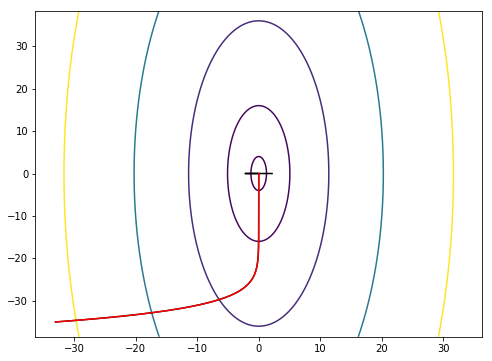

In [303]:
X = np.arange(-1.1*abs(start_point[0]), 1.1*abs(start_point[0]), 0.1)
Y = np.arange(-1.1*abs(start_point[1]), 1.1*abs(start_point[1]), 0.1)
X, Y = np.meshgrid(X, Y)
Z = Q2((X, Y))

plt.figure(figsize=(8, 6))
levels = np.arange(0, 200, 2)**4
plt.contour(X, Y, Z, levels)
plt.plot(*zip(*trace_adadelta), color='black')
plt.plot(*zip(*trace_adam), color='red')

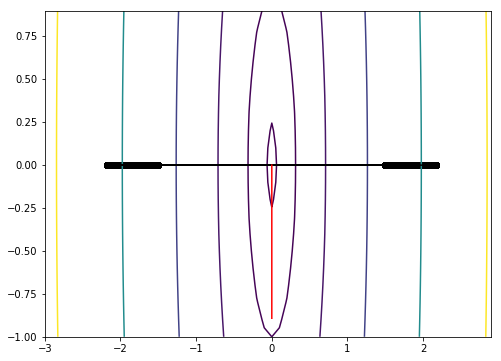

In [304]:
X = np.arange(-3, 3, 0.1)
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = Q2((X, Y))

plt.figure(figsize=(8, 6))
levels = np.arange(0, 200, 0.5)**4
plt.contour(X, Y, Z, levels)
plt.plot(*zip(*trace_adadelta[10000:]), color='black')
plt.scatter(*zip(*trace_adadelta[10000:]), color='black')
plt.plot(*zip(*trace_adam[11000:]), color='red')

#TODO Анимации

In [337]:
def stoch_adam(
    grad, 
    w_init, 
    X, 
    Y, 
    batch_size = 20, 
    n_epochs = 2, 
    learning_rate = 0.01, 
    decay_rate1 = 0.9, 
    decay_rate2 = 0.999, 
    epsilon = 1e-8
):
    w = w_init
    expected_grad = 0
    expected_norm_grad = 0
    X_splited, Y_splited, n_batches = split_in_batches(X, Y, batch_size)
    iters_done = 1
    for i in range(n_epochs):
        for curr_batch in range(n_batches):
            curr_grad = grad(X_splited[curr_batch], Y_splited[curr_batch], w)
            expected_grad = expected_grad * decay_rate1 + (1 - decay_rate1) * curr_grad
            expected_norm_grad = expected_norm_grad * decay_rate2 + (1 - decay_rate2) * np.dot(curr_grad.T, curr_grad)
            corrected_expected_grad = expected_grad / (1 - decay_rate1**iters_done)
            corrected_expected_norm_grad = expected_norm_grad / (1 - decay_rate2**iters_done)
            shift = learning_rate * corrected_expected_grad / (np.sqrt(corrected_expected_norm_grad) + epsilon)
            w = w - shift
            iters_done += 1
    return w

In [340]:
weights_adam_mnist = stoch_adam(
    grad_log_loss,
    np.zeros((mnist_train_data.shape[1], 1)),
    mnist_train_data,
    mnist_train_labels,
)

print("Качество на валидационной выборке:", accuracy_validation(weights_adam_mnist))

Качество на валидационной выборке: 0.995594713656
